In [35]:
import numpy as np
import math

In [36]:
x = [4,1,2,3,4,5,7]

In [37]:
# Define functions S_i, n_i

def S1(tau, x):
  sum = 0
  for i, number in enumerate(x):
    if i < tau:
      sum += number

  return sum

def S2(tau, x):
  sum = 0
  for i, number in enumerate(x):
    if i >= tau:
      sum += number

  return sum

def n1(tau,x):
  return len(x[:tau])



def n2(tau,x):
  return len(x[tau:])

In [38]:
np.arange(31)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [39]:
step_data1 = np.array([6847, 4083, 11058, 3725, 711, 1078, 2168, 10495, 7368, 2620, 540, 10465, 9404, 9733, 11113, 12435, 14505, 3247, 18083, 11394, 11561, 20272, 13350, 5050, 9001, 12478, 6311, 13072, 12348, 10643, 16705])
x = np.round(step_data1/1000,0)

In [40]:
alpha = 81/25
beta = 9/25

In [47]:
# Calculate the sum of the un-normalised PMF over all values of tau

log_pi = [0]*31
for tau in np.arange(30):

  log_pi[tau] = (
        math.lgamma(S1(tau,x) + alpha)
        - (S1(tau,x) + alpha) * math.log(n1(tau,x) + beta)
        + math.lgamma(S2(tau,x) + alpha)
        - (S2(tau,x) + alpha) * math.log(n2(tau,x) + beta)
    )


In [60]:
max_log = max(log_pi)
pi = [math.exp(lp - max_log) for lp in log_pi]
Z = np.sum(pi)
pi = [p / Z for p in pi]

<BarContainer object of 31 artists>

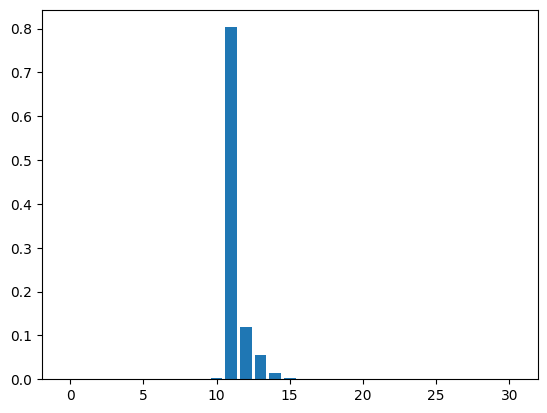

In [52]:
import matplotlib.pyplot as plt

plt.bar(np.arange(31), height=pi)

In [67]:
# Now for the marginal of lambda

# need the Gamma density function

expectation_l1 = 0
for t, p in zip(np.arange(31), pi):
        shape = S1(t,x) + alpha
        rate = n1(t,x) + beta
        expectation_l1 += p * (shape / rate)


In [68]:
expectation_l1

np.float64(4.885398275553094)

In [63]:
expectation_l2 = 0
for t, p in zip(np.arange(31), pi):
        shape = S2(t,x) + alpha
        rate = n2(t,x) + beta
        expectation_l2 += p * (shape / rate)

In [69]:
expectation_l2

np.float64(11.429683702300613)